# K- means clustering Code
## CS2201 course

### **1. Importing Necessary Libraries**

In [1]:
import pandas as pd # Used for handling tabular data
import numpy as np # Provides support for numerical operations and arrays
import matplotlib.pyplot as plt # Used for data visualization
from sklearn.cluster import KMeans #  Implements the K-Means Clustering Algorithm

### **2. Loading Data from a CSV File**

In [2]:
# Data loading from a file

file_path = '/home/abhisek/CS2201_Spring_2025/eighth_week/data3.csv'  # stores the filename data3.csv, which contains the dataset
data = pd.read_csv(file_path) # reads the CSV file and stores it in a DataFrame (data).

print(data) # displays the dataset

   Avg   SR
0   44   87
1   40   70
2   41   79
3   45  109
4   41   75
5   60  102
6   55  110
7   30  104
8   25  109
9   50  100


**3. Feature Selection**

In [3]:
feature1 = 'Avg'  # Change to your first feature column name
feature2 = 'SR'  # Change to your second feature column name


feature1 and feature2 are set to column names 'Avg' and 'SR'.

These columns are selected as features for clustering

In [4]:
X = data[[feature1, feature2]].values # stores the selected features as a NumPy array (.values extracts values)
print(X) # isplays the extracted feature values

[[ 44  87]
 [ 40  70]
 [ 41  79]
 [ 45 109]
 [ 41  75]
 [ 60 102]
 [ 55 110]
 [ 30 104]
 [ 25 109]
 [ 50 100]]


**4. Finding the Optimal Number of Clusters using the Elbow Method**

#### **a. Setting Up Parameters**

In [5]:
# Setting Up Parameters
cluster_range = range(1, 11) # # Trying clusters from 1 to 10
wcss = []  # List to store Within-Cluster Sum of Squares (WCSS)

The range of possible number of clusters (k) is set from 1 to 10.

wcss (Within-Cluster Sum of Squares) is an empty list to store WCSS values.

#### **b. Loop to Compute WCSS for Different Values of k**

In [6]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia (WCSS) is calculated and stored


- For each **`k`** (number of clusters from 1 to 10):
  - **`KMeans(n_clusters=k, init='k-means++', random_state=42)`** initializes the K-Means model:
    - `n_clusters=k`: Number of clusters.
    - `init='k-means++'`: Smart centroid initialization to avoid random initialization trap.
    - `random_state=42`: Ensures reproducibility.
  - **`kmeans.fit(X)`** applies clustering to the feature data.
  - **`kmeans.inertia_`** stores the sum of squared distances between points and their assigned cluster center (WCSS).
  - **`wcss.append(kmeans.inertia_)`** adds this value to the `wcss` list.



### **5. Visualizing the Elbow Method Plot**


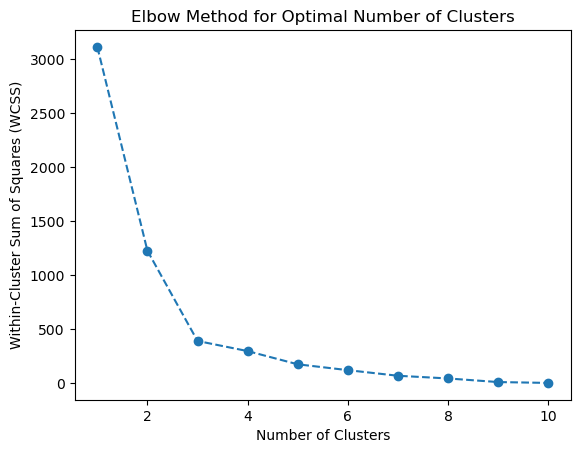

In [7]:
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

- Plots **number of clusters (x-axis) vs. WCSS (y-axis)**.
- **Elbow Point**: The point where WCSS decreases at a slower rate, indicating the best number of clusters.

---

### **6. User Input for Optimal k**


In [8]:
optimal_k = int(input("Based on the elbow plot, enter the optimal number of clusters: "))


- The user manually enters the **best number of clusters** based on the elbow plot.

---


### **7. Applying K-Means Clustering**


In [9]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)


- Initializes **K-Means** with the selected `optimal_k`.
- **`kmeans.fit_predict(X)`** assigns each data point to a cluster.
- **`clusters`** stores cluster labels (0, 1, 2, …).

---


### **8. Adding Cluster Labels to Data**

In [10]:
data['Cluster'] = clusters


- A new column **"Cluster"** is added to the dataset to store each point's assigned cluster.

---

### **9. Plotting the Clusters**


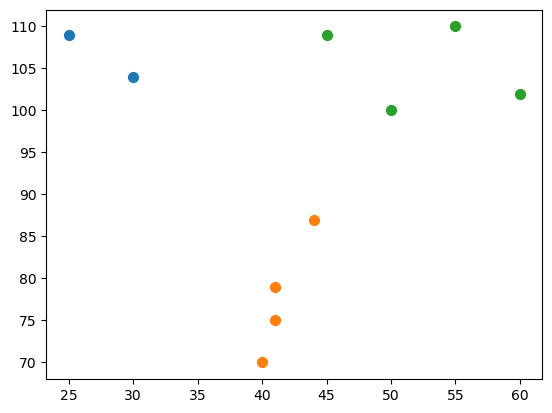

In [11]:
for cluster in range(optimal_k):
    plt.scatter(X[clusters == cluster, 0], X[clusters == cluster, 1], s=50, label=f'Cluster {cluster}')


- Loops through each **cluster (0 to optimal_k - 1)**:
  - Uses `plt.scatter()` to plot all data points in that cluster.
  - Uses different colors for different clusters.

---

### **10. Plotting the Cluster Centroids**

In [16]:
print(kmeans.cluster_centers_)

[[ 27.5  106.5 ]
 [ 41.5   77.75]
 [ 52.5  105.25]]


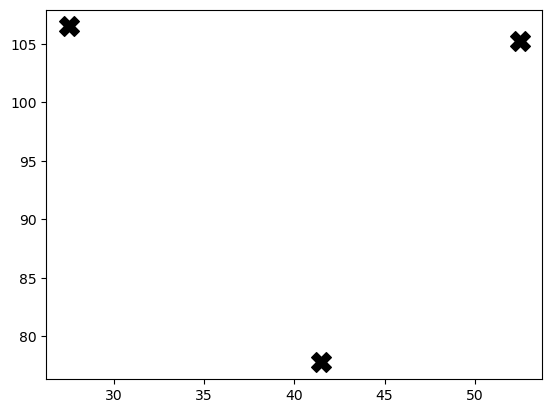

In [17]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')



- **`kmeans.cluster_centers_`** contains the coordinates of the cluster centers.
- Plots the centroids as **black ‘X’ markers** with larger size (`s=200`).

---

### **11. Finalizing and Displaying the Cluster Plot**

[[ 30 104]
 [ 25 109]]
[[ 27.5  106.5 ]
 [ 41.5   77.75]
 [ 52.5  105.25]]


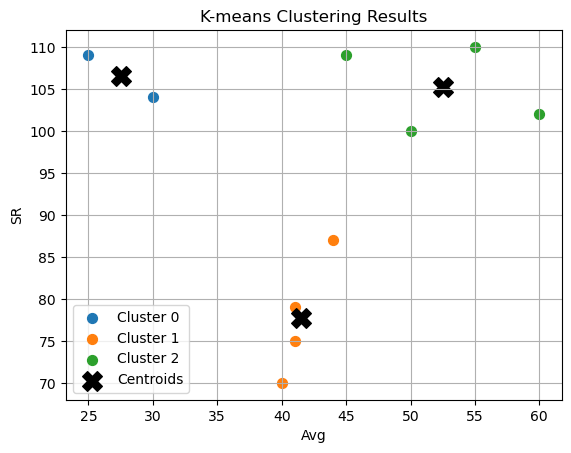

In [22]:
# K-means

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to original data
data['Cluster'] = clusters

# Plotting the clusters

print(X[clusters == 0])

#plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(X[clusters == cluster, 0], X[clusters == cluster, 1], s=50, label=f'Cluster {cluster}')

# Plot the centroids

print(kmeans.cluster_centers_)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title('K-means Clustering Results')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.grid()
plt.show()


- Adds title, axis labels, legend, and grid.
- **`plt.show()`** displays the final **K-means Clustering Plot**.

---

### **12. Displaying the Clustered Data**

In [14]:
print("Data with cluster assignments:")
print(data)

Data with cluster assignments:
   Avg   SR  Cluster
0   44   87        1
1   40   70        1
2   41   79        1
3   45  109        2
4   41   75        1
5   60  102        2
6   55  110        2
7   30  104        0
8   25  109        0
9   50  100        2



- Prints the updated dataset, now with **cluster assignments**.

---